__순차 데이터(sequential data)__는 텍스트나 __시계열 데이터(time series data)__와 같이 순서에 의미가 있는 데이터를 말한다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 한다.<br/>
따라서 순차 데이터를 다룰 떄는 이전에 입력한 데이터를 기억하는 기능이 필요하다. 지금까지 사용한 완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. 하나의 샘플을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 사용할 때 재사용 하지 않는다. 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 __피드포워드 신경망(feedforward neural network, FFNN)__이라고 한다.<br/>
신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이전 데이터가 신경망 층에 순환될 필요가 있다. 이런 신경망을 __순환 신경망(recurrent neural network, RNN)__이라고 한다. 그리고 순환 신경망이 샘플을 처리하는 한 단계를 __타임 스텝(timestep)__이라고 부른다. 타임 스탭이 오래될수록 순환되는 정보는 희미해진다.<br/>
순환 신경망에서는 특별히 층을 __셀(cell)__이라고 부른다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현한다. 또 셀의 출력을 __은닉 상태(hidden state)__라고 부른다. 일반적으로 은닉층의 활성화 함수로는 시그모이드 $tanh^2$가 많이 사용된다.

In [1]:
#데이터를 읽고 자주 등장하는 단어를 토큰화하여 어휘 사전을 작성
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)      #가장 자주 등장하는 단어 500개를 사용

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
#각 세트의 크기를 확인
print(train_input.shape, test_input.shape)      #텍스트의 길이가 제각각이므로 1차원 배열에 저장하여 메모리를 효율적으로 사용했다.

(25000,) (25000,)


In [4]:
#리뷰 길이 확인(토큰 단위)
print(len(train_input[0]))      #첫번째 리뷰
print(len(train_input[1]))      #두번째 리뷰

218
189


In [5]:
#첫번째 리뷰 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
#타깃 데이터 출력(0 : 부정 / 1 : 긍정)
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
#검증세트 제작
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [11]:
#리뷰 길이의 평균값과 중간값을 구해봄
import numpy as np
lengths = np.array([len(x) for x in train_input])     #각 훈련세트의 길이를 저장하는 넘파이 리스트 생성
print(np.mean(lengths), np.median(lengths))     #리뷰 길이 데이터가 한쪽에 치우칠 것 같음

239.00925 178.0


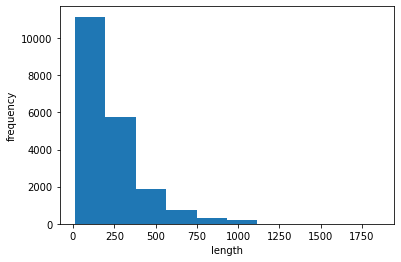

In [12]:
#length 배열을 히스토그램으로 확인
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [13]:
#대부분의 리뷰길이가 300 미만이므로 100개의 단어만 사용하도록 함.
from tensorflow.keras.preprocessing.sequence import pad_sequences     #pad_sequences() : 샘플의 길이를 일정하게 만들도록 잘라내거나 패딩해줌
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

(20000, 100)


In [14]:
#길이를 조절해 만든 배열중 잘라낸 샘플을 출력
print(train_seq[0])     #패딩값이 없는것으로 보아 원래 길이가 100보다 길었음

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [15]:
#원본 샘플을 출력
print(train_input[0])     #비교 결과 pad_sequences()는 앞부분을 잘라낸다는 것을 알 수 있음.(뒷부분을 자르고 싶다면 truncating=post로 설정)

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 2, 20, 17, 2, 2, 4, 436, 20, 9, 2, 6, 2, 7, 493, 2, 6, 185, 250, 24, 55, 2, 5, 23, 350, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 400, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 384, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [16]:
#길이를 조절해 만든 배열중 패딩한 샘플을 출력
print(train_seq[5])     #패딩 또한 앞부분부터 이루어짐(뒷부분을 패딩하고 싶다면 padding=post로 설정)

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [17]:
#검증 세트도 바꿔줌
val_seq = pad_sequences(val_input, maxlen=100)

In [18]:
#순환 신경망 제작
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
#8개의 뉴런, 샘플의 길이 100, imdb.load_data() 함수에서 500개의 단어만 사용하도록 지정했기 때문에 훈련 데이터의 정숫값 범위를 원 핫 인코딩으로 표현하려면 배열의 길이가 500이여야 함
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
#훈련 세트를 원-핫 인코딩 배열을 만듬
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
#원-핫 인코딩 배열의 크기를 확인
print(train_oh.shape)

(20000, 100, 500)


In [21]:
#train_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩 되었나 확인
print(train_oh[0][0][:12])      #첫번째 토큰이 1인지 확인
print(np.sum(train_oh[0][0]))     #원-핫 인코딩이 되었는지 확인

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [22]:
#검증 세트도 원-핫 인코딩을 함
val_oh = keras.utils.to_categorical(val_seq)

In [23]:
#모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [24]:
#순환 신경망 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)      #학습률 10^-4로 지정
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])      #결과값이 2개이므로 이진 교차 엔트로피
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')      #최적 모델 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)      #조기 종료 설정
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 41ms/step - loss: 0.6999 - accuracy: 0.4976 - val_loss: 0.7007 - val_accuracy: 0.4934
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6952 - accuracy: 0.5121 - val_loss: 0.6969 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6921 - accuracy: 0.5229 - val_loss: 0.6938 - val_accuracy: 0.5188
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6885 - accuracy: 0.5403 - val_loss: 0.6891 - val_accuracy: 0.5376
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6786 - accuracy: 0.5827 - val_loss: 0.6755 - val_accuracy: 0.5996
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6637 - accuracy: 0.6304 - val_loss: 0.6578 - val_accuracy: 0.6414
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6468 - accuracy: 0.6648 - val_loss: 0.6434 - val_ac

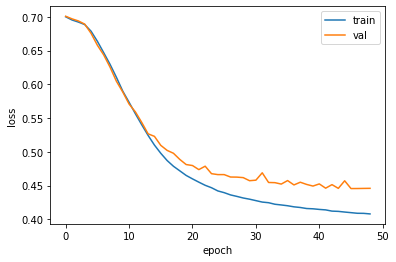

In [27]:
#훈련 손실과 검증손실을 그래프로 그려 훈련 과정을 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
#훈련세트의 원-핫 인코딩 전후 크기를 비교
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


원-핫 인코딩의 단점은 입력 데이터가 매우 커진다는 것이다. 이때문에 순환 신경망에서 텍스트를 처리할 땐 __단어 임베딩(word embedding)__를 즐겨 사용한다.<br/>
단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다. 이런 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많다.

In [29]:
#단어 임베딩을 통한 순환 신경망 제작
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))     #500크기의 어휘사전, 16크기의 임베딩 벡터, 100길이의 입력 시퀀스
model2.add(keras.layers.SimpleRNN(8))     #뉴런 8개
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [30]:
#모델 구조 확인
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [31]:
#훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')      #최적 모델 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)      #조기 종료 설정
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6649 - accuracy: 0.5997 - val_loss: 0.6368 - val_accuracy: 0.6542
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6080 - accuracy: 0.6954 - val_loss: 0.5980 - val_accuracy: 0.7072
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5790 - accuracy: 0.7318 - val_loss: 0.5798 - val_accuracy: 0.7210
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5590 - accuracy: 0.7495 - val_loss: 0.5647 - val_accuracy: 0.7290
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5429 - accuracy: 0.7601 - val_loss: 0.5492 - val_accuracy: 0.7448
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5302 - accuracy: 0.7669 - val_loss: 0.5353 - val_accuracy: 0.7630
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5176 - accuracy: 0.7769 - val_loss: 0.5276 - val_accuracy:

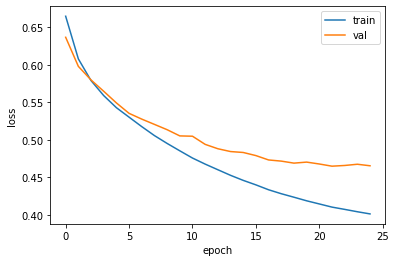

In [32]:
#훈련 손실과 검증손실을 그래프로 그려 훈련 과정을 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()      #검증손실은 정체, 훈련손실은 지속적으로 감소